In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


In [2]:
# Load the stock data from CSV files
vic_df = pd.read_csv('data/VIC.csv')
pnj_df = pd.read_csv('data/PNJ.csv')
mns_df = pd.read_csv('data/MSN.csv')
fpt_df = pd.read_csv('data/FPT.csv')

In [5]:
vic_df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Future_Close,Volatility
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0,98.5,0.0
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0,98.6,0.1
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0,98.6,0.0
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0,98.7,0.1
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0,98.7,0.0
...,...,...,...,...,...,...,...,...,...,...
101260,VIC,2020-12-22 14:21:00,105.8,105.8,105.8,105.8,1070,0,105.7,-0.1
101261,VIC,2020-12-22 14:22:00,105.8,105.8,105.7,105.7,1870,0,105.7,0.0
101262,VIC,2020-12-22 14:23:00,105.7,105.7,105.7,105.7,2510,0,105.7,0.0
101263,VIC,2020-12-22 14:24:00,105.7,105.7,105.7,105.7,3620,0,105.7,0.0


In [6]:
def add_volatility(df, time_lag=1):
    # Sort data by Date/Time
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df = df.sort_values('Date/Time')

    # Calculate the future close price based on the time lag
    df['Future_Close'] = df['Close'].shift(-time_lag)

    # Calculate volatility (Future Price - Current Price)
    df['Volatility'] = df['Future_Close'] - df['Close']

    # Drop rows where Future_Close is NaN
    df = df.dropna()

    return df

# Apply the function to add volatility to each dataset
vic_df = add_volatility(vic_df)
pnj_df = add_volatility(pnj_df)
mns_df = add_volatility(mns_df)
fpt_df = add_volatility(fpt_df)

In [7]:
# Combine datasets from different stocks into one
df = pd.concat([vic_df, pnj_df, mns_df, fpt_df], ignore_index=True)


In [8]:
# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume']
X = df[features]
y = df['Volatility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
# Predict on the test set
y_pred = model.predict(X_test)


Mean Absolute Error: 0.17850297766391077


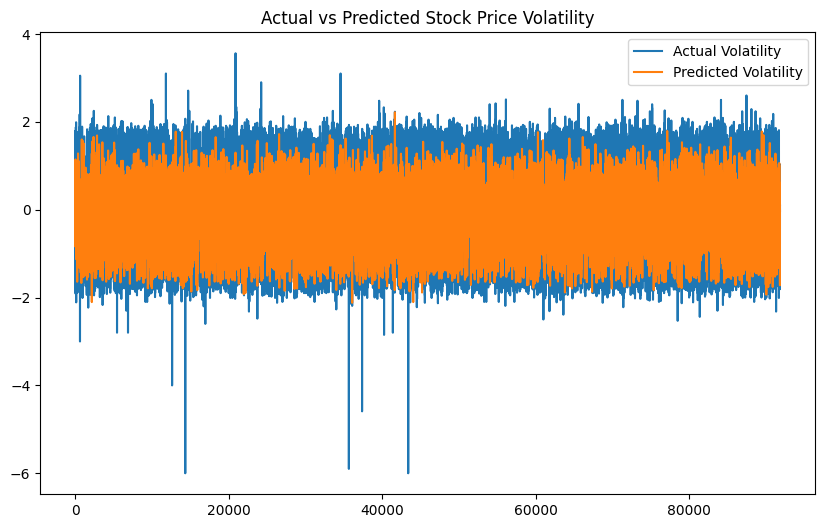

In [11]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Plot Actual vs Predicted Volatility
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Volatility')
plt.plot(y_pred, label='Predicted Volatility')
plt.legend()
plt.title('Actual vs Predicted Stock Price Volatility')
plt.show()


In [13]:
# Predict future volatility for new data
new_data = pd.DataFrame({
    'Open': [100000],  # Example input
    'High': [102000],
    'Low': [99000],
    'Close': [100500],
    'Volume': [200000]
})
predicted_volatility = model.predict(new_data)
print(f'Predicted Volatility: {predicted_volatility[0]}')


Predicted Volatility: -0.021999999999999176


In [15]:
vic_df['Volatility'].unique()

array([ 0. ,  0.1,  0.1, -0.1, -0.1,  0.3, -0.2,  0.2, -0.7,  0.6, -0.5,
        0.5, -0.3, -0.3,  0.3, -2.6,  0.8,  0.6, -0.4,  0.4,  0.2,  1.1,
       -1.1, -0.9,  0.9, -0.2, -0.6, -1. ,  1. ,  0.4,  1.2, -0.8, -2.1,
       -0.6,  0.8, -0.8, -1.1, -1.3, -0.4, -1.7,  1.5, -1.4,  0.7, -1.6,
       -0.9,  0.9,  0.7,  1.4,  2. , -3.8,  3.7,  1.3, -1.9, -7.4,  5. ,
       -0.7,  1.1, -1.5, -1.2, -2. ,  2.8, -2.8,  1.7, -1.6,  1.6, -1.4,
       -4.2,  3.2,  1.9, -1.3, -2.5,  1.8,  1.4, -1.8,  2.4, -2.9,  1.3,
       -3.5, -4.7, -3. ,  3.1, -2.8,  3.9, -6. , -5.8, -2.4,  2.3, -2.2,
       -3.1,  1.6, -5. , -3.2,  3. ,  2.1, -2.3,  2.2,  1.8,  4.1,  2.3,
        2.5, -4.3,  1.2, -3.7, -1.8, -1.9, -4. ,  3.1,  4.9,  2.1,  3.5])

c:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 310s 53ms/step - loss: 0.0031 - val_loss: 2.0155e-05
Epoch 2/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 296s 52ms/step - loss: 9.1034e-04 - val_loss: 2.3802e-05
Epoch 3/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 304s 53ms/step - loss: 9.0066e-04 - val_loss: 5.2324e-05
Epoch 4/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 293s 51ms/step - loss: 9.0702e-04 - val_loss: 1.9829e-05
Epoch 5/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 319s 56ms/step - loss: 9.0329e-04 - val_loss: 3.1649e-05
Epoch 6/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 310s 54ms/step - loss: 9.0667e-04 - val_loss: 1.9340e-05
Epoch 7/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 307s 53ms/step - loss: 9.0630e-04 - val_loss: 1.9339e-05
Epoch 8/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 363s 63ms/step - loss: 9.0476e-04 - val_loss: 1.9871e-05
Epoch 9/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 322s 56ms/step - loss: 9.0682e-04 - val_loss: 2.1547e-05
Epoch 10/10
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 380s 66ms/step - loss: 8.9898e-04 - val_loss: 2.3797e-05
2871/2871 ━━━

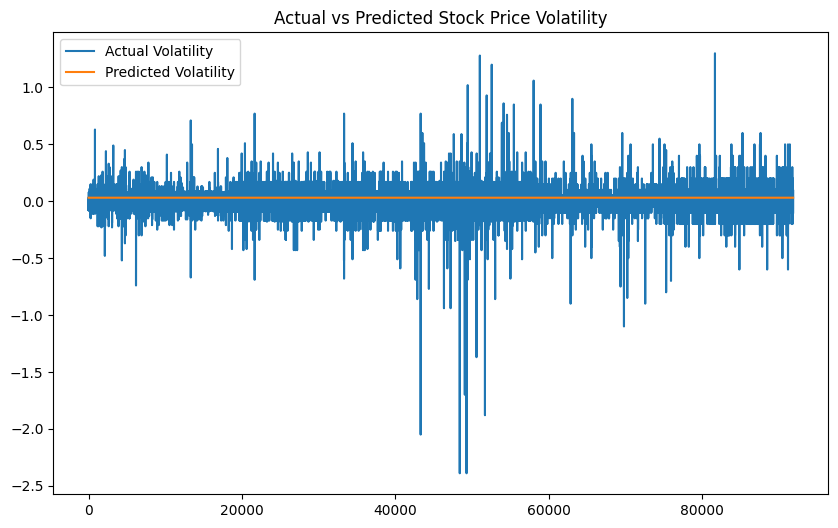

In [12]:

# 2. Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 3. Load Data
vic_df = pd.read_csv('data/VIC.csv')
pnj_df = pd.read_csv('data/PNJ.csv')
mns_df = pd.read_csv('data/MSN.csv')
fpt_df = pd.read_csv('data/FPT.csv')

# 4. Data Preprocessing
def add_volatility(df, time_lag=1):
    df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    df = df.sort_values('Date/Time')
    df['Future_Close'] = df['Close'].shift(-time_lag)
    df['Volatility'] = df['Future_Close'] - df['Close']
    df = df.dropna()
    return df

vic_df = add_volatility(vic_df)
pnj_df = add_volatility(pnj_df)
mns_df = add_volatility(mns_df)
fpt_df = add_volatility(fpt_df)

# 5. Combine Datasets
df = pd.concat([vic_df, pnj_df, mns_df, fpt_df], ignore_index=True)

# 6. Feature Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility']])

# 7. Prepare Data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0:5])  # Use features: Open, High, Low, Close, Volume
        y.append(data[i + time_step, 5])  # Volatility is the target
    return np.array(X), np.array(y)

time_step = 60  # Use 60 previous time steps (e.g., 60 minutes or days)
X, y = create_dataset(scaled_data, time_step)

# Split data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 8. Build LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))

# 9. Compile Model
model.compile(optimizer='adam', loss='mean_squared_error')

# 10. Train Model
model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))

# 11. Make Predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(np.concatenate((np.zeros((y_pred.shape[0], 5)), y_pred), axis=1))[:, -1]
y_test_unscaled = scaler.inverse_transform(np.concatenate((np.zeros((y_test.shape[0], 5)), y_test.reshape(-1, 1)), axis=1))[:, -1]

# 12. Evaluate Model
mae = mean_absolute_error(y_test_unscaled, y_pred)
print(f'Mean Absolute Error: {mae}')

# 13. Plot Actual vs Predicted Volatility
plt.figure(figsize=(10, 6))
plt.plot(y_test_unscaled, label='Actual Volatility')
plt.plot(y_pred, label='Predicted Volatility')
plt.legend()
plt.title('Actual vs Predicted Stock Price Volatility')
plt.show()
